In [277]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [223]:
df_web = pd.read_excel("web.xlsx")
df_erp = pd.read_excel("erp.xlsx")
df_liaison = pd.read_excel("liaison.xlsx")

df_web_origin, df_erp_origin, df_liaison_origin = df_web, df_erp, df_liaison

C:\Users\Utilisateur\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [224]:
df_web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [225]:
df_drop_row = df_web.dropna(axis=0, how='all')
df_drop_column = df_drop_row.dropna(axis=1, how = 'all')
df_web_clean = df_drop_column.drop_duplicates(subset=['sku'])
print(df_web_clean.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            715 non-null    int64         
 2   downloadable       715 non-null    int64         
 3   rating_count       715 non-null    int64         
 4   average_rating     714 non-null    float64       
 5   total_sales        714 non-null    float64       
 6   tax_status         714 non-null    object        
 7   post_author        714 non-null    float64       
 8   post_date          714 non-null    datetime64[ns]
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  post_title         714 non-null    object        
 11  post_excerpt       714 non-null    object        
 12  post_status        714 non-null    object        
 13  comment_status     714 non-null    object        
 14  ping_statu

In [226]:
df_first_merge = pd.merge(df_erp, df_liaison, left_on='product_id', right_on='product_id', how="inner")
df_full = pd.merge(df_first_merge, df_web_clean, left_on='id_web', right_on='sku', how="inner")

In [227]:
df_web_clean

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0


In [228]:
df_clean['year'] = df_clean["post_title"].str[-4:]

In [229]:

print(df_clean.info())
print(df_clean.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 9161
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             715 non-null    int64         
 1   onsale_web             715 non-null    int64         
 2   price                  715 non-null    float64       
 3   stock_quantity         715 non-null    int64         
 4   stock_status           715 non-null    object        
 5   id_web                 714 non-null    object        
 6   sku                    714 non-null    object        
 7   virtual                715 non-null    int64         
 8   downloadable           715 non-null    int64         
 9   rating_count           715 non-null    int64         
 10  average_rating         714 non-null    float64       
 11  total_sales            714 non-null    float64       
 12  tax_status             714 non-null    object        
 13  tax_

## Drop the useless columns

In [230]:

df_cleaned = df_clean.dropna(axis=1, how = 'all')

In [231]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 9161
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         715 non-null    int64         
 1   onsale_web         715 non-null    int64         
 2   price              715 non-null    float64       
 3   stock_quantity     715 non-null    int64         
 4   stock_status       715 non-null    object        
 5   id_web             714 non-null    object        
 6   sku                714 non-null    object        
 7   virtual            715 non-null    int64         
 8   downloadable       715 non-null    int64         
 9   rating_count       715 non-null    int64         
 10  average_rating     714 non-null    float64       
 11  total_sales        714 non-null    float64       
 12  tax_status         714 non-null    object        
 13  post_author        714 non-null    float64       
 14  post_date

## Drop rows where title is nan

In [232]:
df_cleaned_title = df_cleaned.drop(df_cleaned[df_cleaned['post_title']=='nan'].index)
df_cleaned_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 9161
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         715 non-null    int64         
 1   onsale_web         715 non-null    int64         
 2   price              715 non-null    float64       
 3   stock_quantity     715 non-null    int64         
 4   stock_status       715 non-null    object        
 5   id_web             714 non-null    object        
 6   sku                714 non-null    object        
 7   virtual            715 non-null    int64         
 8   downloadable       715 non-null    int64         
 9   rating_count       715 non-null    int64         
 10  average_rating     714 non-null    float64       
 11  total_sales        714 non-null    float64       
 12  tax_status         714 non-null    object        
 13  post_author        714 non-null    float64       
 14  post_date

In [233]:
df_out = df_cleaned[['price' , 'total_sales']]
df_out

,price,total_sales
0,24.2,6.0
2,34.3,0.0
4,20.8,0.0
6,14.1,3.0
8,46.0,0.0
...,...,...
9153,8.4,5.0
9155,27.5,0.0
9157,69.0,0.0
9159,54.8,0.0


<AxesSubplot:xlabel='price'>

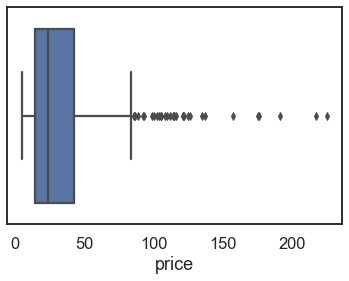

In [235]:
sns.boxplot(x='price', data= df_out)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='price', ylabel='total_sales'>

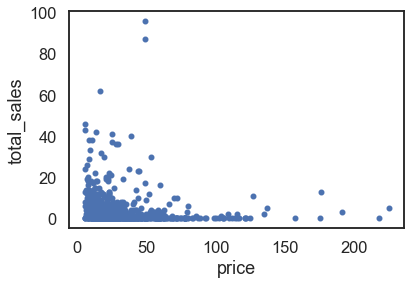

In [236]:
df_out.plot.scatter(x='price', y='total_sales')

In [237]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 9161
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         715 non-null    int64         
 1   onsale_web         715 non-null    int64         
 2   price              715 non-null    float64       
 3   stock_quantity     715 non-null    int64         
 4   stock_status       715 non-null    object        
 5   id_web             714 non-null    object        
 6   sku                714 non-null    object        
 7   virtual            715 non-null    int64         
 8   downloadable       715 non-null    int64         
 9   rating_count       715 non-null    int64         
 10  average_rating     714 non-null    float64       
 11  total_sales        714 non-null    float64       
 12  tax_status         714 non-null    object        
 13  post_author        714 non-null    float64       
 14  post_date

In [242]:
print(df_cleaned.head(3))

   product_id  onsale_web  price  stock_quantity stock_status id_web    sku  \
0        3847           1   24.2               0   outofstock  15298  15298   
2        3849           1   34.3               0   outofstock  15296  15296   
4        3850           1   20.8               0   outofstock  15300  15300   

   virtual  downloadable  rating_count  ...  ping_status  \
0        0             0             0  ...       closed   
2        0             0             0  ...       closed   
4        0             0             0  ...       closed   

                                           post_name       post_modified  \
0        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 09:30:29   
2          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 09:00:17   
4  pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 18:15:03   

    post_modified_gmt post_parent  \
0 2019-12-30 08:30:29         0.0   
2 2019-12-21 08:00:17         0.0   
4 2020-06-26 16:15:03     

In [240]:
df_cleanning = df_cleaned.dropna(subset=['year'])
pd.to_numeric(df_clean['year'])



    product_id  onsale_web  price  stock_quantity stock_status id_web    sku  \
0         3847           1   24.2               0   outofstock  15298  15298   
2         3849           1   34.3               0   outofstock  15296  15296   
4         3850           1   20.8               0   outofstock  15300  15300   
6         4032           1   14.1               0   outofstock  19814  19814   
8         4039           1   46.0               0   outofstock  19815  19815   
10        4040           1   34.3               0   outofstock  15303  15303   
12        4041           1   32.7              15      instock  14975  14975   
14        4042           1   31.2              34      instock  16042  16042   
16        4043           1   60.0              12      instock  14980  14980   
18        4045           1   42.6              66      instock  16041  16041   
20        4046           1   80.0               0   outofstock  15269  15269   
22        4047           1   18.3       

ValueError: Unable to parse string "erve" at position 70

## calculate turn over 

In [243]:
df_cleaned['turn_over'] = df_cleaned['price'] * df_cleaned['total_sales']

<ipython-input-243-1c95d31edd52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['turn_over'] = df_cleaned['price'] * df_cleaned['total_sales']


In [244]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 9161
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         715 non-null    int64         
 1   onsale_web         715 non-null    int64         
 2   price              715 non-null    float64       
 3   stock_quantity     715 non-null    int64         
 4   stock_status       715 non-null    object        
 5   id_web             714 non-null    object        
 6   sku                714 non-null    object        
 7   virtual            715 non-null    int64         
 8   downloadable       715 non-null    int64         
 9   rating_count       715 non-null    int64         
 10  average_rating     714 non-null    float64       
 11  total_sales        714 non-null    float64       
 12  tax_status         714 non-null    object        
 13  post_author        714 non-null    float64       
 14  post_date

## Total turn over

In [247]:
total_turn_over = df_cleaned['turn_over'].sum()

In [248]:
total_turn_over

70568.6

### Valeur aberrante

<AxesSubplot:xlabel='price'>

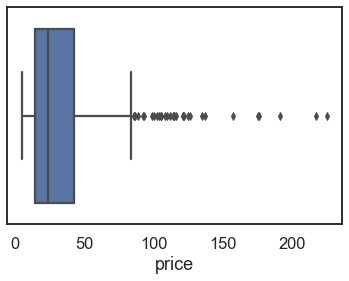

In [266]:
sns.boxplot(x='price', data= df_out)

## z score

In [270]:
df_cleaned['z_score']= stats.zscore(df_cleaned['price'])

<ipython-input-270-de370d14bdf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['z_score']= stats.zscore(df_cleaned['price'])


## Outlier

In [307]:
outliers = df_cleaned.query('-2 <= z_score >= 2')

## kmeans

In [276]:
df_pt = df_cleaned[['price' ,'total_sales']]
df_pt

,price,total_sales
0,24.2,6.0
2,34.3,0.0
4,20.8,0.0
6,14.1,3.0
8,46.0,0.0
...,...,...
9153,8.4,5.0
9155,27.5,0.0
9157,69.0,0.0
9159,54.8,0.0


In [305]:
df_pt_row = df_pt.dropna(axis=0, how='any')
df_pt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 9161
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        715 non-null    float64
 1   total_sales  714 non-null    float64
dtypes: float64(2)
memory usage: 16.8 KB


In [306]:
X = df_pt_clean
X_train, X_test = train_test_split(X, test_size=0.33, random_state=34)
kmeans = KMeans(n_clusters=4, random_state=34).fit(X_train)
X_test['cluster'] = kmeans.predict(X_test)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [301]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 8813 to 8313
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    236 non-null    float64
 1   cluster  236 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 12.7 KB
